In [86]:
import numpy as np
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Linear regression in PyTorch

In [87]:
# Toy data
X = Variable(torch.Tensor([[1, 2],
                           [3, 4],
                           [5, 6], 
                           [1, 3],
                           [7, 14]]))

y = Variable(torch.Tensor([[6],         # y = 2*x_1 + 2*x_2
                           [14], 
                           [22], 
                           [8], 
                           [42]]))     

# Toy test data
X_test = Variable(torch.Tensor([[4, 9],
                                [5, 12]]))

y_test = Variable(torch.Tensor([[26],
                                [34]]))

In [88]:
# Define the model class

class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1) # Input and output size
        
    def forward(self, x):
        """
        Takes Variable as an input 
        Returns Variable
        """
        return self.linear(x)               # Return prediction (y_hat)
        

In [102]:
# Instantiate the model
torch_reg = Model()

In [103]:
# Define loss and optimizer
loss_func = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_reg.parameters(), lr = .0141)

In [104]:
# Define training function
def train_it(x, y, model, n_epochs = 500):
    
    for epoch in range(n_epochs):
        y_pred = model(x)

        loss = loss_func(y_pred, y)
        
        history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch: {epoch:06.2f} | Loss: {loss:10.6f}")

        # Reset gradients, perform backprop, perform optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [105]:
# Capture loss history
history = []

In [106]:
train_it(X, y, torch_reg, n_epochs = 801)

Epoch: 000.00 | Loss: 257.957458
Epoch: 050.00 | Loss:   1.769195
Epoch: 100.00 | Loss:   0.039208
Epoch: 150.00 | Loss:   0.011885
Epoch: 200.00 | Loss:   0.005024
Epoch: 250.00 | Loss:   0.002142
Epoch: 300.00 | Loss:   0.000914
Epoch: 350.00 | Loss:   0.000390
Epoch: 400.00 | Loss:   0.000166
Epoch: 450.00 | Loss:   0.000071
Epoch: 500.00 | Loss:   0.000030
Epoch: 550.00 | Loss:   0.000013
Epoch: 600.00 | Loss:   0.000006
Epoch: 650.00 | Loss:   0.000002
Epoch: 700.00 | Loss:   0.000001
Epoch: 750.00 | Loss:   0.000000
Epoch: 800.00 | Loss:   0.000000


In [107]:
# Predict
y_pred = torch_reg(X_test)

In [108]:
# Compute loss of test
loss_func(y_pred, y_test)

tensor(3.7580e-08, grad_fn=<MseLossBackward>)

In [109]:
# Examine predictions
y_pred

tensor([[26.0002],
        [34.0001]], grad_fn=<AddmmBackward>)

In [110]:
# Nice :)

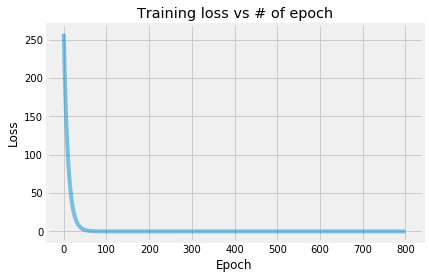

In [112]:
# Plot loss
plt.plot(history, alpha=.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss vs # of epoch')
plt.show()